1. 10120724 - Ichsan Nulmuhlis
2. 10120727 - M. Ilham Akbar
3. 10120729 - Rissopan Panji Prayogi
4. 10120749 - Salman Miftahurohman

# 1.Import Library 

 Pustaka ini menyediakan struktur data yang efisien dan mudah digunakan, terutama DataFrame, yang memungkinkan pengolahan data tabular dan deret waktu

In [256]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Variable Checker

Mengecek Jumlah Berapa Jenis Varible pada Kolom

In [257]:
# Membaca data dari file CSV ke dalam DataFrame
df = pd.read_csv('Dataset/HR Employee Attrition(NAIVE BAYES).xlsx - HR Employee Attrition.csv')

# Menampilkan seluruh DataFrame
display(df)

,level,Age,BusinessTravel,Department,Education,Education1,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,OverTime,ClassAttrition
0,Senior,41,Travel_Rarely,Sales,D3,2,Life Sciences,2,Female,94,2,Sales Executive,Single,Yes,Yes
1,Senior,49,Travel_Frequently,Research & Development,SMA,1,Life Sciences,3,Male,61,2,Research Scientist,Married,No,No
2,Junior Senior,37,Travel_Rarely,Research & Development,D3,2,Other,4,Male,92,1,Laboratory Technician,Single,Yes,Yes
3,Junior Senior,33,Travel_Frequently,Research & Development,S2,4,Life Sciences,4,Female,56,1,Research Scientist,Married,Yes,No
4,Junior,27,Travel_Rarely,Research & Development,SMA,1,Medical,1,Male,40,1,Laboratory Technician,Married,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Junior Senior,36,Travel_Frequently,Research & Development,D3,2,Medical,3,Male,41,2,Laboratory Technician,Married,No,No
1466,Junior Senior,39,Travel_Rarely,Research & Development,SMA,1,Medical,4,Male,42,3,Healthcare Representative,Married,No,No
1467,Junior,27,Travel_Rarely,Research & Development,S1,3,Life Sciences,2,Male,87,2,Manufacturing Director,Married,Yes,No
1468,Senior,49,Travel_Frequently,Sales,S1,3,Medical,4,Male,63,2,Sales Executive,Married,No,No


In [258]:
# Menampilkan jenis atribut pada setiap kolom
for kolom in df.columns:
    jenis_atribut = df[kolom].unique()
    print(f"Jenis Atribut pada Kolom {kolom}:")
    print(jenis_atribut)
    print()

Jenis Atribut pada Kolom level:
['Senior' 'Junior Senior' 'Junior']

Jenis Atribut pada Kolom Age:
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Jenis Atribut pada Kolom BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Jenis Atribut pada Kolom Department:
['Sales' 'Research & Development' 'Human Resources']

Jenis Atribut pada Kolom Education:
['D3' 'SMA' 'S2' 'S1' 'S3']

Jenis Atribut pada Kolom Education1:
[2 1 4 3 5]

Jenis Atribut pada Kolom EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Jenis Atribut pada Kolom EnvironmentSatisfaction:
[2 3 4 1]

Jenis Atribut pada Kolom Gender:
['Female' 'Male']

Jenis Atribut pada Kolom HourlyRate:
[ 94  61  92  56  40  79  81  67  44  84  49  31  93  50  51  80  96  78
  45  82  53  83  58  72  48  42  41  86  97  75  33  37  73  98  36  47
  71  30  43  99  59  95  57  76  87  66  55 

# 3. Preposessing Data

Memastikan data yang dipakai sesuai dengan kebutuhan dalam proses algoritma naive bayes

In [259]:
# Membaca data dari file CSV ke dalam DataFrame
df = pd.read_csv('Dataset/HR Employee Attrition(NAIVE BAYES).xlsx - HR Employee Attrition.csv')

# Menghilangkan kolom 'Age' dan 'Education1'
df = df.drop(['Age', 'Education1'], axis=1)

# Mengubah kolom HourlyRate sesuai dengan kondisi yang diberikan
df['HourlyRate'] = df['HourlyRate'].apply(lambda x: 'LOW' if 30 <= x <= 60 else ('HIGH' if 50 <= x <= 80 else 'OTHER'))

# Menyimpan DataFrame baru ke file CSV
df.to_csv('Dataset/data_train.csv', index=False)

In [303]:
# Membaca data dari file CSV ke dalam DataFrame
df = pd.read_csv('Dataset/data_train.csv')

# Menampilkan seluruh DataFrame
display(df)

,level,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,OverTime,ClassAttrition
0,Senior,Travel_Rarely,Sales,D3,Life Sciences,2,Female,OTHER,2,Sales Executive,Single,Yes,Yes
1,Senior,Travel_Frequently,Research & Development,SMA,Life Sciences,3,Male,HIGH,2,Research Scientist,Married,No,Yes
2,Junior Senior,Travel_Rarely,Research & Development,D3,Other,4,Male,OTHER,1,Laboratory Technician,Single,Yes,Yes
3,Junior Senior,Travel_Frequently,Research & Development,S2,Life Sciences,4,Female,LOW,1,Research Scientist,Married,Yes,Yes
4,Junior,Travel_Rarely,Research & Development,SMA,Medical,1,Male,LOW,1,Laboratory Technician,Married,No,Yes
5,Junior Senior,Travel_Frequently,Research & Development,D3,Life Sciences,4,Male,HIGH,1,Laboratory Technician,Single,No,No
6,Senior,Travel_Rarely,Research & Development,S1,Medical,3,Female,OTHER,1,Laboratory Technician,Married,Yes,No
7,Junior Senior,Travel_Rarely,Research & Development,SMA,Life Sciences,4,Male,HIGH,1,Laboratory Technician,Divorced,No,No
8,Junior Senior,Travel_Frequently,Research & Development,S1,Life Sciences,4,Male,LOW,3,Manufacturing Director,Single,No,No
9,Junior Senior,Travel_Rarely,Research & Development,S1,Medical,3,Male,OTHER,2,Healthcare Representative,Married,No,No


In [304]:
# Menampilkan jenis atribut pada setiap kolom
for kolom in df.columns:
    jenis_atribut = df[kolom].unique()
    print(f"Jenis Atribut pada Kolom {kolom}:")
    print(jenis_atribut)
    print()

Jenis Atribut pada Kolom level:
['Senior' 'Junior Senior' 'Junior']

Jenis Atribut pada Kolom BusinessTravel:
['Travel_Rarely' 'Travel_Frequently']

Jenis Atribut pada Kolom Department:
['Sales' 'Research & Development']

Jenis Atribut pada Kolom Education:
['D3' 'SMA' 'S2' 'S1']

Jenis Atribut pada Kolom EducationField:
['Life Sciences' 'Other' 'Medical']

Jenis Atribut pada Kolom EnvironmentSatisfaction:
[2 3 4 1]

Jenis Atribut pada Kolom Gender:
['Female' 'Male']

Jenis Atribut pada Kolom HourlyRate:
['OTHER' 'HIGH' 'LOW']

Jenis Atribut pada Kolom JobLevel:
[2 1 3]

Jenis Atribut pada Kolom JobRole:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative']

Jenis Atribut pada Kolom MaritalStatus:
['Single' 'Married' 'Divorced']

Jenis Atribut pada Kolom OverTime:
['Yes' 'No']

Jenis Atribut pada Kolom ClassAttrition:
['Yes' 'No']



# 4. Menentukan Nilai Prior

Perhitungan nilai prior dalam konteks Naive Bayes dilakukan dengan menghitung proporsi atau probabilitas kemunculan setiap kelas dalam dataset. Secara sederhana, nilai prior dari suatu kelas (Class) adalah jumlah frekuensi kemunculan kelas tersebut dibagi dengan total jumlah data. Berikut adalah langkah-langkah umum untuk menghitung nilai prior:

1. Hitung Jumlah Data: Hitung total jumlah data dalam dataset.
2. Hitung Jumlah Kemunculan Setiap Kelas: Hitung jumlah kemunculan setiap kelas (ClassAttrition) dalam dataset.
3. Hitung Nilai Prior untuk Setiap Kelas: Hitung nilai prior untuk setiap kelas dengan membagi jumlah kemunculan kelas tersebut dengan total jumlah data.


In [305]:
# Hitung total jumlah data
total_data = len(df)

# Hitung jumlah kemunculan setiap kelas
jumlah_kelas_0 = df['ClassAttrition'].value_counts()['No']
jumlah_kelas_1 = df['ClassAttrition'].value_counts()['Yes']

# Hitung nilai prior untuk setiap kelas
prior_kelas_0 = jumlah_kelas_0 / total_data
prior_kelas_1 = jumlah_kelas_1 / total_data

# Menampilkan hasil perhitungan
print("N(T):", total_data)
print("N(A1) 'No':", jumlah_kelas_0)
print("N(A2) 'Yes':", jumlah_kelas_1)
print("P(A1) 'No':", prior_kelas_0)
print("P(A2) 'Yes':", prior_kelas_1)


N(T): 10
N(A1) 'No': 5
N(A2) 'Yes': 5
P(A1) 'No': 0.5
P(A2) 'Yes': 0.5


# 5. Tabel Kontigensi

Tabel kontingensi atau confusion matrix digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan hasil prediksi model dengan nilai aktual atau ground truth. Dalam konteks Naive Bayes, kita dapat membuat tabel kontingensi dengan menghitung berapa banyak prediksi model yang benar dan berapa banyak yang salah untuk setiap kelas.


In [306]:
# Membaca data dari file CSV ke dalam DataFrame
df = pd.read_csv('Dataset/data_train.csv')

# Menggunakan ClassAttrition sebagai variabel aktual
variabel_prediksi = 'ClassAttrition'

# Menentukan nilai yang mungkin untuk ClassAttrition
nilai_class_attrition = df[variabel_prediksi].unique()

# Iterasi melalui setiap kolom (variabel) dan menghitung tabel kontingensi
for kolom in df.columns:
    if kolom != variabel_prediksi:
        print(f"\nTabel Kontingensi untuk {kolom} terhadap {variabel_prediksi}:")
        for nilai_prediksi in nilai_class_attrition:
            tabel_kontingensi = pd.crosstab(index=df[kolom], columns=df[variabel_prediksi] == nilai_prediksi, margins=True, margins_name='Total')
            print(f"\n{nilai_prediksi}:\n{tabel_kontingensi}")



Tabel Kontingensi untuk level terhadap ClassAttrition:

Yes:
ClassAttrition  False  True  Total
level                             
Junior              0     1      1
Junior Senior       4     2      6
Senior              1     2      3
Total               5     5     10

No:
ClassAttrition  False  True  Total
level                             
Junior              1     0      1
Junior Senior       2     4      6
Senior              2     1      3
Total               5     5     10

Tabel Kontingensi untuk BusinessTravel terhadap ClassAttrition:

Yes:
ClassAttrition     False  True  Total
BusinessTravel                       
Travel_Frequently      2     2      4
Travel_Rarely          3     3      6
Total                  5     5     10

No:
ClassAttrition     False  True  Total
BusinessTravel                       
Travel_Frequently      2     2      4
Travel_Rarely          3     3      6
Total                  5     5     10

Tabel Kontingensi untuk Department terhadap ClassAttriti

Hasil Pelatihan

In [307]:
# Iterasi melalui setiap kolom (variabel) dan menghitung tabel kontingensi
for kolom in df.columns:
    if kolom != variabel_prediksi:
        print(f"\nTabel Kontingensi untuk {kolom} terhadap {variabel_prediksi}:")
        for nilai_prediksi in nilai_class_attrition:
            tabel_kontingensi = pd.crosstab(index=df[kolom], columns=df[variabel_prediksi] == nilai_prediksi, margins=True, margins_name='Total')
            
            # Membagi hasil dengan N(A1) untuk 'No' dan N(A2) untuk 'Yes'
            if nilai_prediksi == 'Yes':
                print(f"\n{nilai_prediksi}:\n{tabel_kontingensi/jumlah_kelas_1}")
            elif nilai_prediksi == 'No':
                print(f"\n{nilai_prediksi}:\n{tabel_kontingensi/jumlah_kelas_0}")


Tabel Kontingensi untuk level terhadap ClassAttrition:

Yes:
ClassAttrition  False  True  Total
level                             
Junior            0.0   0.2    0.2
Junior Senior     0.8   0.4    1.2
Senior            0.2   0.4    0.6
Total             1.0   1.0    2.0

No:
ClassAttrition  False  True  Total
level                             
Junior            0.2   0.0    0.2
Junior Senior     0.4   0.8    1.2
Senior            0.4   0.2    0.6
Total             1.0   1.0    2.0

Tabel Kontingensi untuk BusinessTravel terhadap ClassAttrition:

Yes:
ClassAttrition     False  True  Total
BusinessTravel                       
Travel_Frequently    0.4   0.4    0.8
Travel_Rarely        0.6   0.6    1.2
Total                1.0   1.0    2.0

No:
ClassAttrition     False  True  Total
BusinessTravel                       
Travel_Frequently    0.4   0.4    0.8
Travel_Rarely        0.6   0.6    1.2
Total                1.0   1.0    2.0

Tabel Kontingensi untuk Department terhadap ClassAttriti

# 6. Probabilitas Likelihood

Menghitung Iterasi Probabilitas Likelihood adalah langkah kedua dalam algoritma Naive Bayes. Probabilitas Likelihood menggambarkan seberapa sering suatu nilai fitur muncul dalam setiap kelas yang berbeda.

In [308]:
# Iterasi melalui setiap kolom (variabel) dan menghitung Probabilitas Likelihood
for kolom in df.columns:
    if kolom != variabel_prediksi:
        print(f"\nProbabilitas Likelihood untuk {kolom} terhadap {variabel_prediksi}:")

        # Hitung Probabilitas Likelihood untuk setiap nilai prediksi
        for nilai_prediksi in nilai_class_attrition:
            # Filter dataframe berdasarkan nilai prediksi
            subset_df = df[df[variabel_prediksi] == nilai_prediksi]

            # Hitung Probabilitas Likelihood untuk setiap nilai fitur dalam kelas tertentu
            for nilai_fitur in df[kolom].unique():
                try:
                    prob_likelihood = subset_df[kolom].value_counts()[nilai_fitur] / len(subset_df)
                    print(f"\n{nilai_prediksi} - {nilai_fitur}:\nProbabilitas Likelihood: {prob_likelihood}")
                except KeyError:
                    print(f"\n{nilai_prediksi} - {nilai_fitur}:\nProbabilitas Likelihood: 0 (Data tidak tersedia)")




Probabilitas Likelihood untuk level terhadap ClassAttrition:

Yes - Senior:
Probabilitas Likelihood: 0.4

Yes - Junior Senior:
Probabilitas Likelihood: 0.4

Yes - Junior:
Probabilitas Likelihood: 0.2

No - Senior:
Probabilitas Likelihood: 0.2

No - Junior Senior:
Probabilitas Likelihood: 0.8

No - Junior:
Probabilitas Likelihood: 0 (Data tidak tersedia)

Probabilitas Likelihood untuk BusinessTravel terhadap ClassAttrition:

Yes - Travel_Rarely:
Probabilitas Likelihood: 0.6

Yes - Travel_Frequently:
Probabilitas Likelihood: 0.4

No - Travel_Rarely:
Probabilitas Likelihood: 0.6

No - Travel_Frequently:
Probabilitas Likelihood: 0.4

Probabilitas Likelihood untuk Department terhadap ClassAttrition:

Yes - Sales:
Probabilitas Likelihood: 0.2

Yes - Research & Development:
Probabilitas Likelihood: 0.8

No - Sales:
Probabilitas Likelihood: 0 (Data tidak tersedia)

No - Research & Development:
Probabilitas Likelihood: 1.0

Probabilitas Likelihood untuk Education terhadap ClassAttrition:

Yes 

# 7. Prediksi Kelas:

Pilih kelas dengan probabilitas posterior tertinggi sebagai prediksi untuk setiap instance dalam set pengujian.


In [309]:
def prediksi_kelas(data):
    probabilitas_posterior = {}

    # Iterasi melalui nilai kelas yang mungkin
    for nilai_kelas in nilai_class_attrition:
        probabilitas_posterior[nilai_kelas] = 1.0

        # Iterasi melalui setiap kolom (variabel)
        for kolom in df.columns:
            if kolom != variabel_prediksi:
                # Hitung Probabilitas Likelihood langsung dari DataFrame
                count_values = df.groupby([kolom, variabel_prediksi]).size().reset_index(name='count')
                total_kelas = df[variabel_prediksi].value_counts()[nilai_kelas]

                # Handling kasus jika nilai_fitur tidak ada di count_values
                nilai_fitur = data[kolom]
                prob_likelihood = (count_values[(count_values[kolom] == nilai_fitur) & (count_values[variabel_prediksi] == nilai_kelas)]['count'].values + 1) / (total_kelas + len(df[kolom].unique()))

                # Mengambil nilai Probabilitas Likelihood dari hasil sebelumnya
                if len(prob_likelihood) == 0:
                    probabilitas_posterior[nilai_kelas] = 0.0
                    break

                # Kalikan dengan Probabilitas Posterior
                probabilitas_posterior[nilai_kelas] *= prob_likelihood[0]

    # Pilih kelas dengan probabilitas tertinggi
    kelas_terpilih = max(probabilitas_posterior, key=probabilitas_posterior.get)
    return kelas_terpilih


# 8. Pengujian

Pengujian model Naive Bayes dilakukan dengan menguji seberapa baik model tersebut dapat memprediksi kelas target

In [311]:
data_prediksi = {
    'level': 'Junior',
    'BusinessTravel': 'Travel_Frequently',
    'Department': 'Research & Development',
    'Education': 'SMA',
    'EducationField': 'Life Sciences',
    'EnvironmentSatisfaction': 3,
    'Gender': 'MALE',
    'HourlyRate': 'HIGH',
    'JobLevel': 3,
    'JobRole': 'Research Scientist',
    'MaritalStatus': 'Married',
    'OverTime': 'No'
}

hasil_prediksi = prediksi_kelas(data_prediksi)
print(f"Hasil prediksi kelas: {hasil_prediksi}")


Hasil prediksi kelas: Yes


Hasil Pengujian

In [300]:
# Membaca data uji dari file CSV
data_uji = pd.read_csv('Dataset/data_test.csv')

# Menambahkan kolom 'Hasil_Prediksi' ke DataFrame
data_uji['Hasil_Prediksi'] = data_uji.apply(prediksi_kelas, axis=1)

# Evaluasi model
akurasi = sum(data_uji['ClassAttrition'] == data_uji['Hasil_Prediksi']) / len(data_uji)

print(f"Akurasi: {akurasi}")


Akurasi: 0.7023411371237458


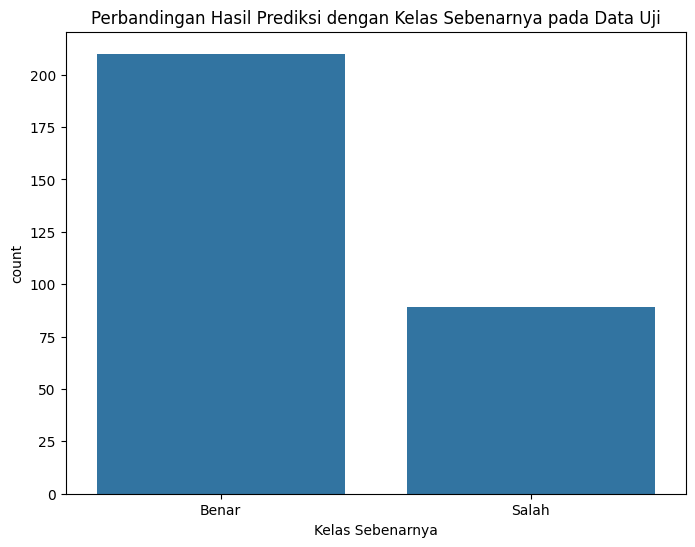

In [301]:
# Menghitung jumlah prediksi yang benar dan salah
correct_predictions = data_uji[data_uji['ClassAttrition'] == data_uji['Hasil_Prediksi']]
incorrect_predictions = data_uji[data_uji['ClassAttrition'] != data_uji['Hasil_Prediksi']]

# Menyiapkan data untuk visualisasi
data_visualization = pd.DataFrame({
    'Kelas Sebenarnya': ['Benar'] * len(correct_predictions) + ['Salah'] * len(incorrect_predictions)
})

# Membuat diagram batang
plt.figure(figsize=(8, 6))
sns.countplot(x='Kelas Sebenarnya', data=data_visualization)
plt.title('Perbandingan Hasil Prediksi dengan Kelas Sebenarnya pada Data Uji')
plt.show()


In [302]:
# Membaca data uji dari file CSV
data_uji = pd.read_csv('data_input.csv')

# Menambahkan kolom 'Hasil_Prediksi' ke DataFrame
data_uji['Hasil_Prediksi'] = data_uji.apply(prediksi_kelas, axis=1)

# Menampilkan hasil prediksi kelas 'ClassAttrition'
hasil_prediksi_kelas = data_uji[['ClassAttrition', 'Hasil_Prediksi']]
print("\nHasil Prediksi Kelas:")
print(hasil_prediksi_kelas)



Hasil Prediksi Kelas:
  ClassAttrition Hasil_Prediksi
0            Yes            Yes
1             No             No
2            Yes            Yes
3             No            Yes
4             No            Yes
5             No            Yes
6             No            Yes
7             No             No
8             No             No
9             No             No
